## Train Random Forest Model for Odor Prediction

We will:
1. Load the cleaned feature dataset.
2. Encode odor labels.
3. Split into train/test sets.
4. Train a Random Forest Classifier.
5. Evaluate using accuracy, confusion matrix, and feature importance.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("../data/final_dataset.csv")  # Replace with your actual combined dataset
df = df.groupby('odor').filter(lambda x: len(x) > 1)
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (44, 252)


,name,odor,GGI9,GGI8,nSpiro,Xc-4d,NssNH,nN,n6ARing,n5aRing,...,AATS1p,ATS6s,BCUTi-1h,AATSC4d,MAXdssC,NssO,piPC6,AATSC5v,RNCG,SIC2
0,Limonene,citrus,-0.144338,-0.277603,-0.206284,-0.494501,-0.144338,-0.206284,-0.471405,-0.206284,...,0.839963,0.454846,-2.837340,0.951234,1.226679,-0.836315,0.454765,0.875067,-2.294629,0.217669
1,Vanillin,sweet,-0.144338,-0.277603,-0.206284,-0.494501,-0.144338,-0.206284,-0.471405,-0.206284,...,0.454923,-0.260969,0.267913,0.077194,-0.660642,1.026386,0.946020,0.202370,0.477215,1.713690
2,Linalool,floral,-0.144338,-0.277603,-0.206284,-0.494501,-0.144338,-0.206284,-0.471405,-0.206284,...,-1.562701,-0.232526,0.252482,1.222204,1.312509,1.026386,-0.971948,0.831557,0.602927,-0.557225
3,Linalyl acetate,floral,-0.144338,4.391573,-0.206284,-0.494501,-0.144338,-0.206284,-0.471405,-0.206284,...,-0.860508,1.952844,0.276722,0.954805,1.292907,1.026386,0.043740,0.345537,-0.480775,-1.232581
4,Citral,citrus,-0.144338,-0.277603,-0.206284,-0.494501,-0.144338,-0.206284,-0.471405,-0.206284,...,-0.320105,0.260486,0.267685,1.374617,1.269868,-0.836315,-0.085097,0.341206,-0.283519,-0.479804


In [25]:
df['odor'].value_counts()

odor
floral      14
spicy        5
woody        5
sweet        4
fruity       4
citrus       3
musk         3
menthol      2
herbal       2
balsamic     2
Name: count, dtype: int64

In [14]:
X = df.drop(columns=["name", "odor"])
y = df["odor"]

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn.utils.multiclass import unique_labels

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}\n")

# Only include labels present in predictions and test set
present_labels = unique_labels(y_test, y_pred)

print(classification_report(
    y_test,
    y_pred,
    target_names=[le.classes_[i] for i in present_labels],
    labels=present_labels
))

✅ Accuracy: 0.5556

              precision    recall  f1-score   support

    balsamic       1.00      1.00      1.00         1
      citrus       0.00      0.00      0.00         1
      floral       0.60      1.00      0.75         3
      fruity       0.00      0.00      0.00         2
     menthol       0.00      0.00      0.00         1
       sweet       0.50      1.00      0.67         1
       woody       0.00      0.00      0.00         0

    accuracy                           0.56         9
   macro avg       0.30      0.43      0.35         9
weighted avg       0.37      0.56      0.44         9



c:\Users\HMS\miniconda3\envs\scentient\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HMS\miniconda3\envs\scentient\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HMS\miniconda3\envs\scentient\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shap

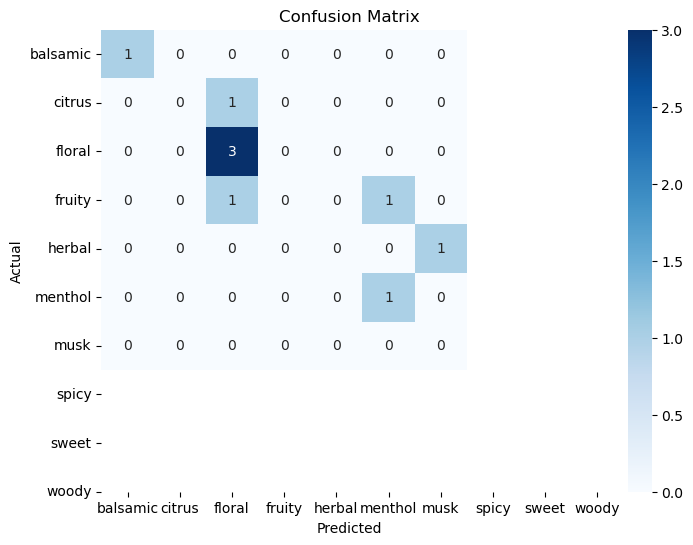

In [20]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

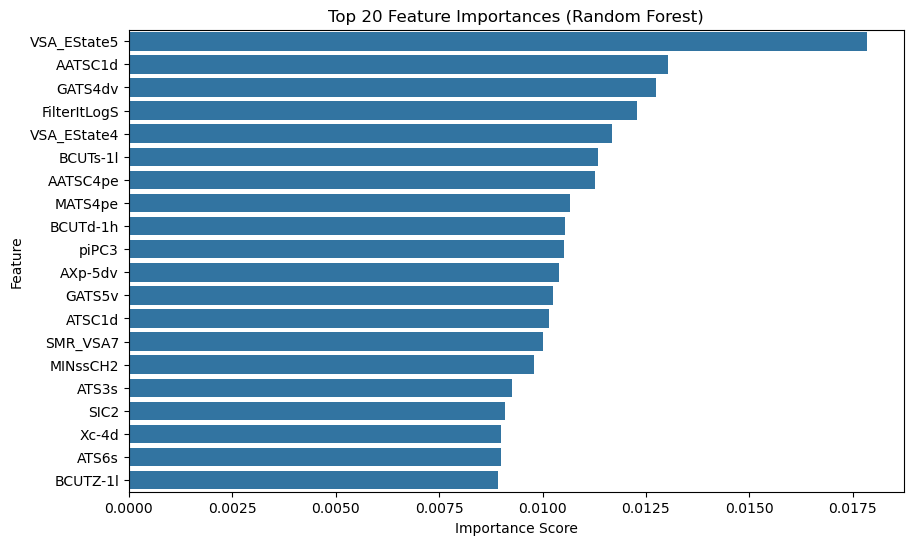

In [21]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # Top 20 features
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()